<a href="https://colab.research.google.com/github/yashwanth-kokkanti/machinelearning_practise/blob/master/ransacRegression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## This example demonstrates Ransac Regression. 
## Ransac => Random sample consensus works by selecting few samples randimly and eliminates outliers. 
## This model is robust to outliers. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets


In [3]:
n_samples = 25000
n_outliers = 2000 ## 8% of data is outliers. 


## GEnerate Data 
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)



In [4]:
## Add Outlier data 

np.random.seed(0)
X[:n_outliers] = 5 + 0.57 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)


In [6]:
X[:n_outliers]

array([[6.00550984],
       [5.22808961],
       [5.55788065],
       ...,
       [5.09030729],
       [4.34911619],
       [4.25274689]])

In [7]:
# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Linear Model with Ransac Algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_ ## Boolean mask of inliers classified as True.
outlier_mask = np.logical_not(inlier_mask)

In [10]:
# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]    

line_y = lr.predict(line_X) ## LInear Regression 
line_y_ransac = ransac.predict(line_X) ## Ridge Regression 

In [11]:
# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)


Estimated coefficients (true, linear regression, RANSAC):
15.587247276136718 [4.64319539] [15.83303268]


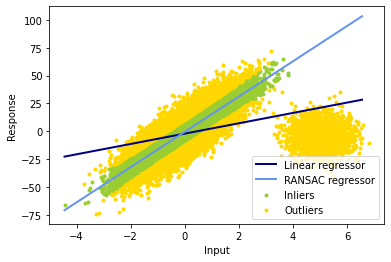

In [12]:
## PLot all the Models 

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')

plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')

plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')

plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,label='RANSAC regressor')

plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()